In [1]:
%run 1._Add_Psilocybin_to_Coynebacterium_Model.ipynb

No objective coefficients in model. Unclear what should be optimized


In [2]:
#to set optimization (this is the production of psilocybin from the precursor)
with model:
    model.objective = model.reactions.EX_psi_e
    print(model.optimize().objective_value)

5.69299883708285e-05


In [3]:
model.reactions.query('biomass','name') #CG_biomass_cgl_ATCC13032 is our biomass production

[<Reaction CG_biomass_cgl_ATCC13032 at 0x165a95926a0>,
 <Reaction EX_biomass at 0x165a9ab75c0>]

In [4]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [5]:
goal = "EX_psi_e" #write goal here

In [6]:
product = model.reactions.EX_psi_e

In [7]:
growth = model.reactions.CG_biomass_cgl_ATCC13032

In [8]:
basemedium = model.medium
basemedium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 4.67,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 16.5067783333334,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

Changing Bounds of Involved Reactions

In [9]:
model.reactions.EX_o2_e.bounds = -50,0
model.reactions.EX_glc_e.bounds = -50,0

# Oxygen

#### Oxygen vs Product


In [10]:
medium = basemedium
medium["EX_o2_e"] = 100     
model.medium = medium

In [11]:
product_oxy = production_envelope(model,
                reactions=[model.reactions.EX_o2_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [12]:
product_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc_e,0.0,0.0,0.0,0.000000,0.000000,0.000000,-16.161130
1,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-15.405641
2,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-14.650152
3,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-13.894662
4,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-13.139173
5,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-12.383683
6,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-11.628194
7,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-10.872704
8,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-10.117215
9,EX_glc_e,0.0,0.0,0.0,0.000057,0.000024,0.000019,-9.361725


<AxesSubplot:xlabel='Oxygen Flux mmol/gDW/h', ylabel='Psilocybin Flux mmol/gDW/h'>

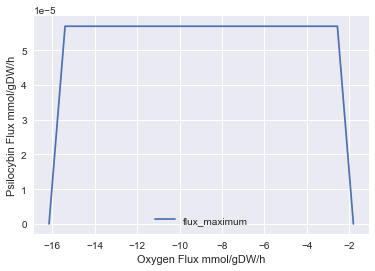

In [13]:
product_oxy.plot(x='EX_o2_e', y='flux_maximum',xlabel = "Oxygen Flux mmol/gDW/h", ylabel="Psilocybin Flux mmol/gDW/h")

In [14]:
growth_oxy = production_envelope(model,
                reactions=[model.reactions.EX_o2_e],
                objective=[growth],
                carbon_sources=[model.reactions.EX_glc_e])

C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 26.227799999999995 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 47.309599999999996 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 21.0818 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 1.809384 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.073913K20.35556Mg0.904692Mn0.072104Ni0.033655Zn0.035554Cl0.542815)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packa

<AxesSubplot:xlabel='Oxygen Flux mmol/gDW/h', ylabel='Growth Rate 1/h'>

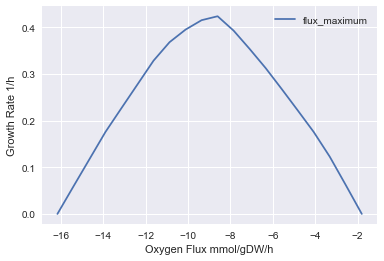

In [15]:
growth_oxy.plot(x='EX_o2_e', y='flux_maximum',xlabel = "Oxygen Flux mmol/gDW/h", ylabel="Growth Rate 1/h") #big difference between DM_psi_c and psiK2

# Glucose

In [16]:
medium = basemedium
medium["EX_glc_e"] = 100
model.medium = medium

In [17]:
product_glucose = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

<AxesSubplot:xlabel='Glucose Flux mmol/gDW/h', ylabel='Psilocybin Flux mmol/gDW/h'>

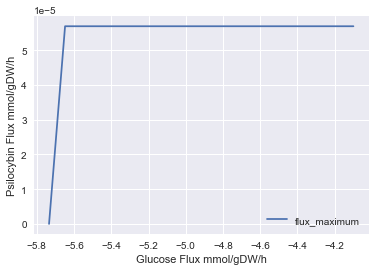

In [18]:
product_glucose.plot(x='EX_glc_e', y='flux_maximum',xlabel = "Glucose Flux mmol/gDW/h", ylabel="Psilocybin Flux mmol/gDW/h")

As in seen in growth_glucose below, the graph cuts off due to a negative growth rate.

In [19]:
growth_glucose = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[growth],
                carbon_sources=[model.reactions.EX_glc_e])

C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 26.227799999999995 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 47.309599999999996 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 21.0818 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 1.809384 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.073913K20.35556Mg0.904692Mn0.072104Ni0.033655Zn0.035554Cl0.542815)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packa

<AxesSubplot:xlabel='Glucose Flux mmol/gDW/h', ylabel='Growth Rate 1/h'>

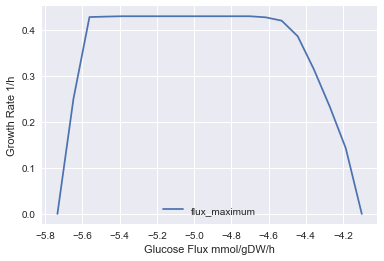

In [20]:
growth_glucose.plot(x='EX_glc_e', y='flux_maximum',xlabel = "Glucose Flux mmol/gDW/h", ylabel="Growth Rate 1/h")

# Various other Uptakes

NH4, SO4, Pi, H2O, K, Na, and CO2

In [21]:
medium = basemedium

In [22]:
model.reactions.EX_nh4_e.bounds = -50,50
model.reactions.EX_so4_e.bounds = -50,50
model.reactions.EX_pi_e.bounds = -50,50
model.reactions.EX_so4_e.bounds = -50,50
model.reactions.EX_h2o_e.bounds = -50,50
model.reactions.EX_k_e.bounds = -50,50
model.reactions.EX_na1_e.bounds = -50,50
model.reactions.EX_co2_e.bounds = -50,50

In [23]:
product_ammonia = production_envelope(model,
                reactions=[model.reactions.EX_nh4_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [24]:
product_sulfate = production_envelope(model,
                reactions=[model.reactions.EX_so4_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [25]:
product_phosphate = production_envelope(model,
                reactions=[model.reactions.EX_pi_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [26]:
product_water = production_envelope(model,
                reactions=[model.reactions.EX_h2o_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [27]:
product_potassium = production_envelope(model,
                reactions=[model.reactions.EX_k_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [28]:
product_sodium = production_envelope(model,
                reactions=[model.reactions.EX_na1_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

In [29]:
product_carbondioxide = production_envelope(model,
                reactions=[model.reactions.EX_co2_e],
                objective=[product],
                carbon_sources=[model.reactions.EX_glc_e])

<AxesSubplot:xlabel='EX_nh4_e'>

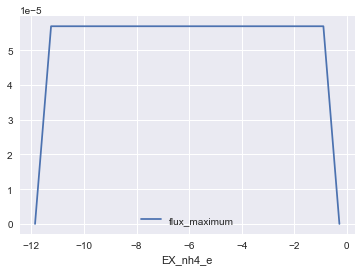

In [30]:
product_ammonia.plot(x='EX_nh4_e', y='flux_maximum')

<AxesSubplot:xlabel='EX_so4_e'>

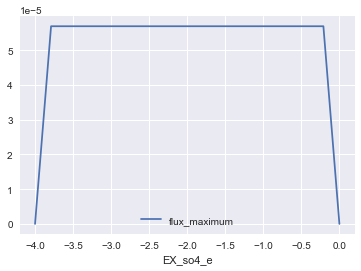

In [31]:
product_sulfate.plot(x='EX_so4_e', y='flux_maximum')

<AxesSubplot:xlabel='EX_pi_e'>

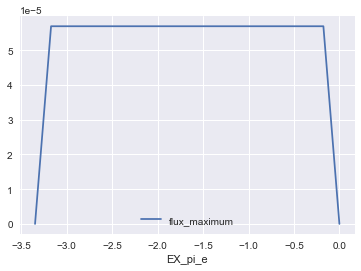

In [32]:
product_phosphate.plot(x='EX_pi_e', y='flux_maximum')

<AxesSubplot:xlabel='EX_h2o_e'>

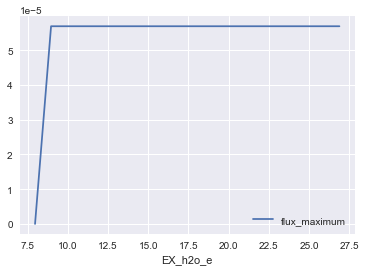

In [33]:
product_water.plot(x='EX_h2o_e', y='flux_maximum')

<AxesSubplot:xlabel='EX_k_e'>

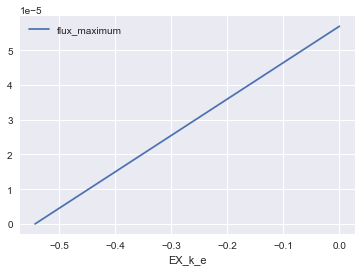

In [34]:
product_potassium.plot(x='EX_k_e', y='flux_maximum')

<AxesSubplot:xlabel='EX_na1_e'>

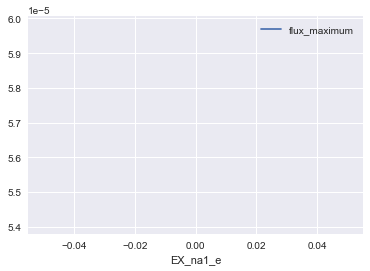

In [40]:
product_sodium.plot(x='EX_na1_e', y='flux_maximum') #doesn't seem sodium is important

<AxesSubplot:xlabel='EX_co2_e'>

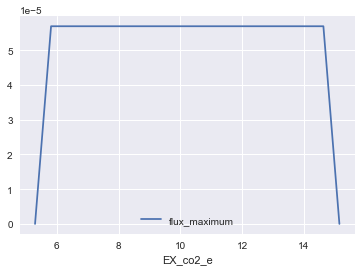

In [37]:
product_carbondioxide.plot(x='EX_co2_e', y='flux_maximum')

In [38]:
basemedium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 100,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 100,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}